# C0LLECTING DATA 

In [1]:
#Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix, classification_report,log_loss



In [2]:
#Reading data
data=pd.read_csv('ChurnData.csv')
data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
# Check the sixe of dataset
data.shape


(200, 28)

# ANALYSING THE DATA

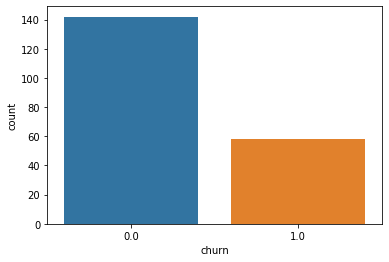

In [4]:
# Count plot
sb.countplot(x='churn',data=data)

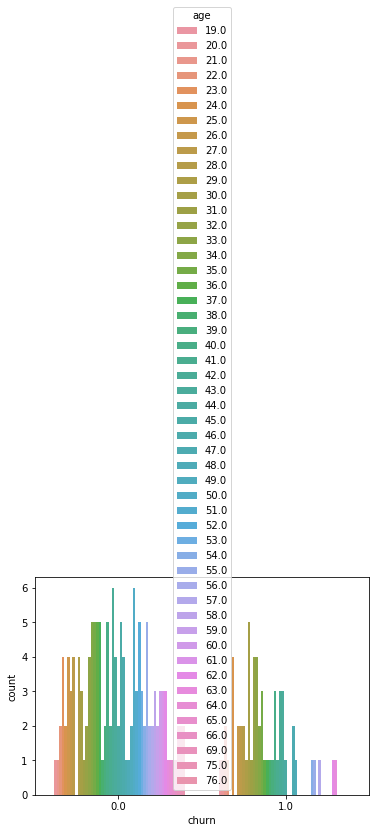

In [5]:
# Count plot
sb.countplot(x='churn',hue='age',data=data,linewidth=5)

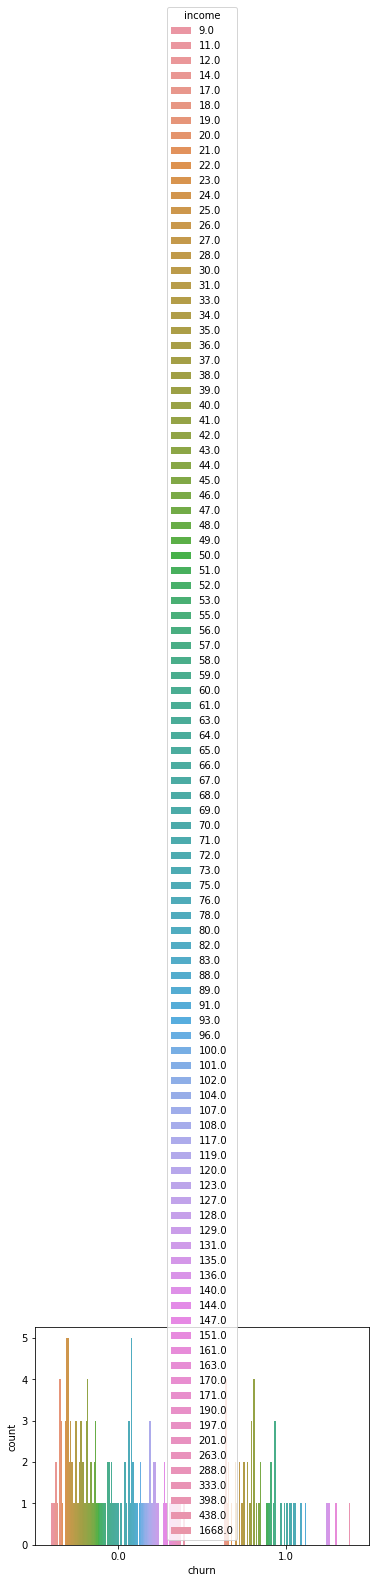

In [6]:
# Count plot
sb.countplot(x='churn',hue='income',data=data,linewidth=5)

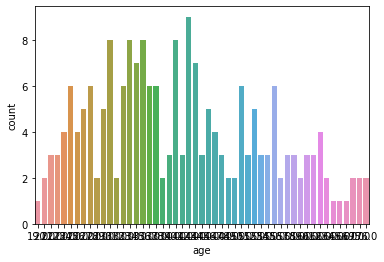

In [7]:
#Count Plot
sb.countplot(x='age',data=data)

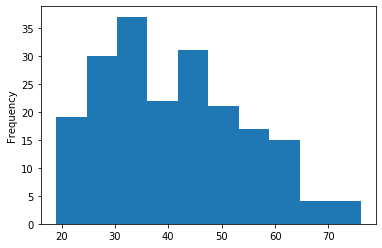

In [8]:
# Histogram
data['age'].plot.hist()

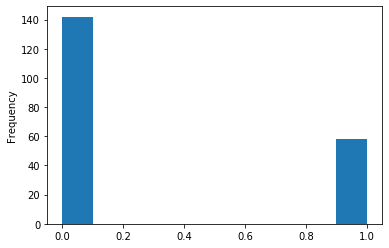

In [9]:
# Histogram
data['churn'].plot.hist()

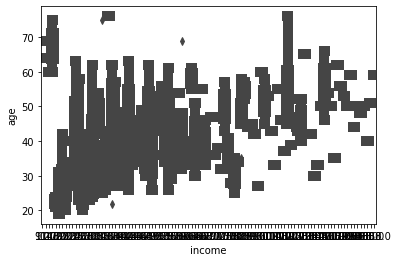

In [10]:
# BOX PLOT
sb.boxplot(x='income',y='age',data=data,linewidth=10)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

# DATA WRANGLING

In [12]:
# CHECKING PRESENCE OF NAN VALUES
data.isnull()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# IF NAN PRESENT CHECK HOW MANY
data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

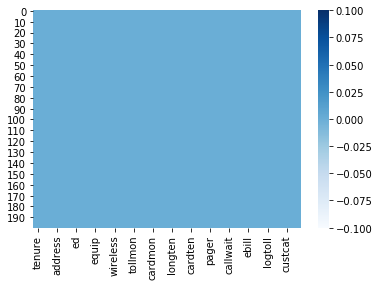

In [14]:
# Counting number of nan values via heatmaps
sb.heatmap(data.isnull(),cmap='Blues')

In [15]:
data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [16]:
'''# Replace nan value or delete that column
new_data=data.drop(columns=['tenure','age'])

#Droping nan
data.dropna(inplace=True)
new_data.head()'''

"# Replace nan value or delete that column\nnew_data=data.drop(columns=['tenure','age'])\n\n#Droping nan\ndata.dropna(inplace=True)\nnew_data.head()"

In [17]:
'''# To replace column with string values to dummy values
newcolumn=pd.get_dummies(data['age'],drop_first=True)'''

"# To replace column with string values to dummy values\nnewcolumn=pd.get_dummies(data['age'],drop_first=True)"

In [18]:
'''# Adding new columns to data
data=pd.concat(['',''],axis=1)'''

"# Adding new columns to data\ndata=pd.concat(['',''],axis=1)"

# TRAIN AND TEST THE MODEL

In [19]:
# Required x and y
x=np.asanyarray(data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y=np.asanyarray(data[['churn']])
print(x,y,sep='\n')

[[11. 33.  7. ...  5.  5.  0.]
 [33. 33. 12. ...  2.  0.  0.]
 [23. 30.  9. ...  1.  2.  0.]
 ...
 [ 6. 32. 10. ...  1. 10.  0.]
 [24. 30.  0. ...  4.  5.  0.]
 [61. 50. 16. ...  2. 22.  1.]]
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.

In [20]:
#Normalizing the input
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x,x.shape)

[[-1.13518441 -0.62595491 -0.4588971  ...  1.6961288  -0.58477841
  -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 ... -0.6433592  -1.14437497
  -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   ... -1.42318853 -0.92053635
  -0.85972695]
 ...
 [-1.36680743 -0.7026181  -0.16283445 ... -1.42318853 -0.02518185
  -0.85972695]
 [-0.53296457 -0.85594447 -1.14970993 ...  0.91629947 -0.58477841
  -0.85972695]
 [ 1.18104577  0.67731925  0.42929083 ... -0.6433592   1.31784991
   1.16316   ]] (200, 7)


In [21]:
# Dividing x and y into train and test data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print(x_train,x_train.shape,y_train,y_train.shape,x_test,x_test.shape,y_test,y_test.shape,sep='\n')

[[ 1.08839657  0.14067695 -0.75495974 ... -0.6433592   1.31784991
  -0.85972695]
 [ 0.85677355  0.06401376 -1.14970993 ...  0.91629947 -0.92053635
   1.16316   ]
 [ 0.94942275  0.9073088   1.12010367 ...  1.6961288   0.42249541
   1.16316   ]
 ...
 [ 0.71779974  0.60065606  1.71222895 ... -1.42318853  0.64633403
  -0.85972695]
 [-1.50578124 -0.7026181  -0.75495974 ... -0.6433592   0.08673747
   1.16316   ]
 [-0.53296457 -0.47262854 -0.16283445 ...  1.6961288  -0.4728591
   1.16316   ]]
(160, 7)
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

In [22]:
# optimization of data
lr=linear_model.LogisticRegression(C=0.01, solver='liblinear')
lr.fit(x_train,y_train)
print(lr.coef_,lr.intercept_)

[[-0.15263644 -0.07909038 -0.07213623 -0.01963967  0.05192709 -0.09501257
   0.16014221]] [-0.26753705]


C:\python_spy\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Predicting the data
predict=lr.predict(x_test)
print(predict)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


In [24]:
predict_prob=lr.predict_proba(x_test)
print(predict_prob)

[[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]
 [0.55386646 0.44613354]
 [0.52237207 0.47762793]
 [0.60514349 0.39485651]
 [0.41069572 0.58930428]
 [0.6333873  0.3666127 ]
 [0.58068791 0.41931209]
 [0.62768628 0.37231372]
 [0.47559883 0.52440117]
 [0.4267593  0.5732407 ]
 [0.66172417 0.33827583]
 [0.55092315 0.44907685]
 [0.51749946 0.48250054]
 [0.485743   0.514257  ]
 [0.49011451 0.50988549]
 [0.52423349 0.47576651]
 [0.61619519 0.38380481]
 [0.52696302 0.47303698]
 [0.63957168 0.36042832]
 [0.52205164 0.47794836]
 [0.50572852 0.49427148]
 [0.70706202 0.29293798]
 [0.55266286 0.44733714]
 [0.52271594 0.47728406]
 [0.51638863 0.48361137]
 [0.71331391 0.28668609]
 [0.67862111 0.32137889]
 [0.50896403 0.49103597]
 [0.42348082 0.57651918]
 [0.71495838 0.28504162]
 [0.59711064 0.40288936]
 [0.63808839 0.36191161]
 [0.39957895 0.60042105]
 [0.52127638 0.47872362]
 [0.65975464 0.34024536]
 [0.5114172  0.4885828 ]]

# EVALUATION

In [25]:
#jaccard index method
jaccard_similarity_score(y_test, predict)

C:\python_spy\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

In [26]:
# Confusion matrix analysis

cm=confusion_matrix(y_test,predict)
print(cm)



[[24  1]
 [ 9  6]]


In [27]:
#Accuracy evaluation
accuracy_score(y_test,predict)

0.75

In [28]:
# Prcision and F-1 Value
print (classification_report(y_test, predict))


              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [29]:
# Log-Loss
log_loss(y_test, predict_prob)

0.6017092478101187